(2, 1)
(2, 2)
(2, 4)
(2, 8)
(2, 16)
(2, 32)
(2, 64)
(2, 128)
(2, 256)
(2, 512)
(2, 1024)
(2, 2048)
(2, 4096)
(2, 8192)
(2, 16384)
(2, 32768)
(2, 65536)
(2, 131072)
(2, 262144)
(2, 524288)
(2, 1048576)
(4, 1)
(4, 2)
(4, 4)
(4, 8)
(4, 16)
(4, 32)
(4, 64)
(4, 128)
(4, 256)
(4, 512)
(4, 1024)
(4, 2048)
(4, 4096)
(4, 8192)
(4, 16384)
(4, 32768)
(4, 65536)
(4, 131072)
(4, 262144)
(4, 524288)
(4, 1048576)
(8, 1)
(8, 2)
(8, 4)
(8, 8)
(8, 16)
(8, 32)
(8, 64)
(8, 128)
(8, 256)
(8, 512)
(8, 1024)
(8, 2048)
(8, 4096)
(8, 8192)
(8, 16384)
(8, 32768)
(8, 65536)
(8, 131072)
(8, 262144)
(8, 524288)
(8, 1048576)
(16, 1)
(16, 2)
(16, 4)
(16, 8)
(16, 16)
(16, 32)
(16, 64)
(16, 128)
(16, 256)
(16, 512)
(16, 1024)
(16, 2048)
(16, 4096)
(16, 8192)
(16, 16384)
(16, 32768)
(16, 65536)
(16, 131072)
(16, 262144)
(16, 524288)
(16, 1048576)
(32, 1)
(32, 2)
(32, 4)
(32, 8)
(32, 16)
(32, 32)
(32, 64)
(32, 128)
(32, 256)
(32, 512)
(32, 1024)
(32, 2048)
(32, 4096)
(32, 8192)
(32, 16384)
(32, 32768)
(32, 65536)
(32, 1

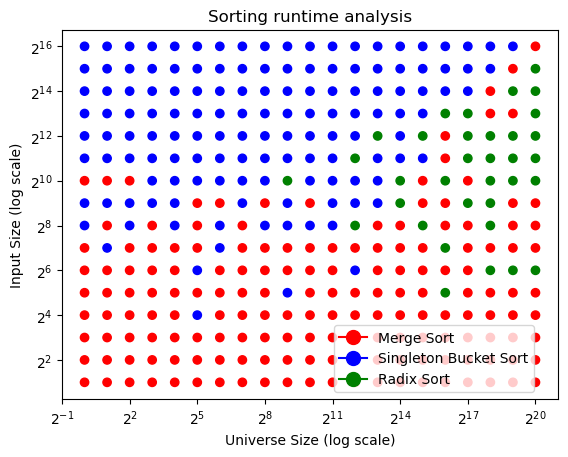

In [1]:
from ps1 import singletonBucketSort, mergeSort, radixSort 
import random 
import time
import itertools 
import sys 
import math
import matplotlib.pyplot as plt 

"""
After completing the functions for singletonBucketSort and RadixSort, run this file to 
generate a plot of the transition points (to be submitted in your problem set for 3d). 

On a high-level, in these experiments, we iterate over the possible combinations 
of (n, U) for 1 <= n <= 2^16 and 2 <= U <= 2^20. For each (n, U) combination 
we average the runtime of each algorithm over N trials and then plot the 
fastest algorithm with an associated color.  
"""

# sets the number of trials to run when timing each algorithm (feel free to change this!)
N = 2

# generates set of (n, U) combinations within the given constraints 
n_U_set = list(itertools.product([int(math.pow(2, x)) for x in range(1, 17)], [int(math.pow(2, x)) for x in range(0, 21, 1)]))

def gen_random_arr(n, U):
    """generates random array given n and universe U"""
    arr = [(random.randint(0, U - 1), "foo") for _ in range(n)]
    return (arr, U, n)


def compute_average_time(algo, A, u, n, N): 
    """calculates average runtime over N trials of given algo and A, U, and n"""
    total_runtime = 0 
    for _ in range(N): 
        if algo == "singletonBucketSort": 
            s = time.time() 
            singletonBucketSort(u, A)
            t = time.time() 
            total_runtime += (t - s)
        elif algo == "mergeSort": 
            s = time.time() 
            mergeSort(A)
            t = time.time() 
            total_runtime += (t - s)
        else: 
            s = time.time() 
            radixSort(u, max(2, min(n,u)), A)
            t = time.time() 
            total_runtime += (t - s)

    return total_runtime / N 

def plot_graph(): 
    """plots a scatter plot of fastest algorithms at each (n, U) combination"""
    X = [] 
    Y = [] 

    # Singleton Bucket Sort - blue, Merge Sort - red, Radix Sort - green
    colors = []

    # for each combination, find fastest algorithm on average of N trials 
    for combo in n_U_set: 
        print(combo)
        y, x = combo 
        X.append(x)
        Y.append(y)
        
        arr, U, n = gen_random_arr(y, x)
        
        mergeSort = ('red', compute_average_time('mergeSort', arr, U, n, N))
        singletonBucketSort = ('blue', compute_average_time('singletonBucketSort', arr, U, n, N))
        radixSort = ('green', compute_average_time('radixSort', arr, U, n, N))

        min_val = sys.maxsize 
        min_color = ""

        for algorithm in [mergeSort, singletonBucketSort, radixSort]: 
            color, t = algorithm 
            if (t < min_val): 
                min_val = t 
                min_color = color 
        
        # assign color to point (n, U) to denote fastest algorithm 
        colors.append(min_color)


    legend_colors = ['red', 'blue', 'green']
    labels = ['Merge Sort', 'Singleton Bucket Sort', 'Radix Sort']

    legend_handles = [
        plt.Line2D([0], [0], marker='o', color=color, label=label, markersize=10)
        for color, label in zip(legend_colors, labels)
    ]


    # plot graph 
    plt.scatter(X, Y, c=colors)
    plt.xscale('log', base=2)
    plt.yscale('log', base=2)

    plt.xlabel("Universe Size (log scale)")
    plt.ylabel("Input Size (log scale)")

    plt.title("Sorting runtime analysis")

    plt.legend(handles=legend_handles, loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

    plt.savefig('scatter_plot.png')

    plt.show()

plot_graph()


So far I have found lecture most helpful, since although reading the textbook and checking recommended readings is helpful, having someone explain it verbally in a way that has to be made clear by the nature of the format itself is very helpful. Being able to ask questions during lecture is also helpful since I can ask them at a time when my mind is at the time deeply engaged in the material. Reading material is helpful but often when a student is reading they may not be in the most prime or distraction-free environment to engage with the material best.